In [1]:
import csv
import time
import random
import requests
from lxml import etree
import pandas as pd

In [2]:
restaurants =pd.read_csv('sampled_restaurants.csv')
reviews =pd.read_csv('reviews.csv')

In [3]:
restaurants.columns

Index(['city', 'title', 'rank', 'point', 'link', 'review_n', 'rank_review'], dtype='object')

In [4]:
reviews.columns

Index(['city', 'restaurant', 'username', 'location', 'has_profile', 'friend',
       'review', 'photo', 'text', 'date', 'rating', 'fake', 'local'],
      dtype='object')

In [5]:
restaurants = restaurants.rename(columns={'title': 'restaurant'})

In [6]:
import re
import html

def remove_non_ascii(text):
    # 先解码 HTML 实体编码，然后再去除非 ASCII 字符
    text = html.unescape(str(text))
    return re.sub(r'[^\x00-\x7F]+', '', text)

# 在应用函数之前，确保 'text' 列中的所有值都是字符串
reviews['restaurant'] = reviews['restaurant'].apply(remove_non_ascii)
restaurants['restaurant'] = restaurants['restaurant'].apply(remove_non_ascii)

In [7]:
final_yelp = restaurants.merge(reviews, on=['restaurant', 'city'], how='left')

In [8]:
final_yelp.drop(columns=['link','rank_review'], inplace=True)

In [9]:
final_yelp.shape

(486756, 16)

In [10]:
table = final_yelp.head()
display(table)

,city,restaurant,rank,point,review_n,username,location,has_profile,friend,review,photo,text,date,rating,fake,local
0,Alameda,Jong Ga House,236,4.0,2300.0,Ernesto B.,"Oakland, CA",0.0,0.0,1.0,0.0,"Amazing food, great people, good music. Strong...",8/25/2023,5.0,0.0,0.0
1,Alameda,Jong Ga House,236,4.0,2300.0,Katrina F.,"San Francisco, CA",1.0,914.0,101.0,410.0,"4 days prior, I called in a reservation for a ...",9/7/2023,5.0,0.0,0.0
2,Alameda,Jong Ga House,236,4.0,2300.0,Mario V.,"San Francisco, CA",1.0,86.0,13.0,2.0,Edit: TLDR - <br>FORMER LOYAL CUSTOMER. <br>CO...,9/5/2023,1.0,0.0,0.0
3,Alameda,Jong Ga House,236,4.0,2300.0,Giselle A.,"Martinez, CA",1.0,240.0,15.0,0.0,"If you're looking for Korean BBQ, your search ...",9/4/2023,5.0,0.0,0.0
4,Alameda,Jong Ga House,236,4.0,2300.0,Seth E.,"Dublin, CA",1.0,249.0,40.0,76.0,This is my second time here and we had made a ...,8/30/2023,4.0,0.0,0.0


In [11]:
final_yelp['rating'].value_counts()

5.0    242691
4.0    122839
3.0     52450
1.0     36648
2.0     32126
Name: rating, dtype: int64

In [12]:
final_yelp.to_csv('yelp.csv')

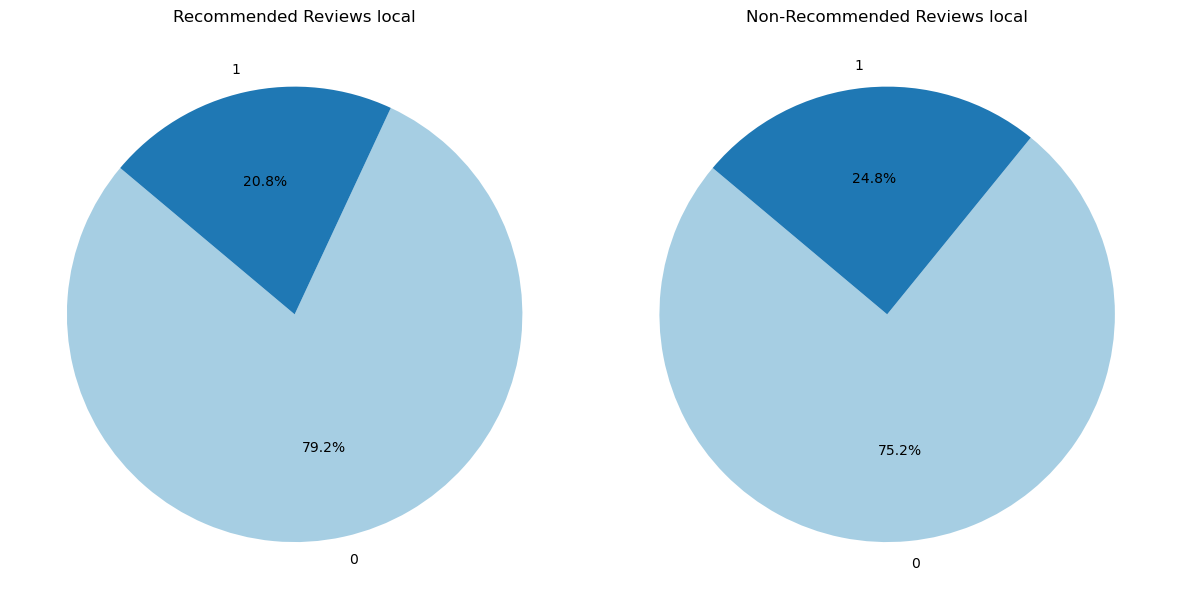

In [31]:
recommend_reviews = final_yelp[final_yelp['fake'] == 0]
non_recommend_reviews = final_yelp[final_yelp['fake'] == 1]

# 获取所有评分的唯一值
unique_ratings = final_yelp['chain'].unique()

# 设置颜色循环，确保相同评分值具有相同的颜色
colors = plt.cm.Paired(range(len(unique_ratings)))

# 绘制推荐评论的饼状图
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.gca().set_prop_cycle('color', colors)
plt.pie(recommend_reviews['local'].value_counts(), labels=unique_ratings, autopct='%1.1f%%', startangle=140)
plt.title('Recommended Reviews local')

# 绘制非推荐评论的饼状图
plt.subplot(122)
plt.gca().set_prop_cycle('color', colors)
plt.pie(non_recommend_reviews['local'].value_counts(), labels=unique_ratings, autopct='%1.1f%%', startangle=140)
plt.title('Non-Recommended Reviews local')

plt.tight_layout()
plt.show()